Alejandro Alvarez Lopez

Estefania Dussan Puerta

Valentina Gómez Giraldo

In [1]:
#####paquete básicos ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### paquetes de sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#### paquetes de redes neuronales

import tensorflow as tf
from tensorflow import keras


In [4]:
!pip install keras_tuner

In [5]:
### paquete de afinamiento para nn de tensorflor

import keras_tuner as kt

In [6]:
#### paquetes de evaluación de modelos de sklearn

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
credit_df = pd.read_csv("/content/drive/MyDrive/COLAB/credit_card_clients (1).csv") # se carga la abse de datos
credit_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,530.293538,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [9]:
#Duplicados
credit_df.shape

(8950, 18)

In [10]:
credit_df.drop_duplicates().shape # Se eliminan los registros duplicados

(8950, 18)

In [11]:
#Nulos
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
credit_df["MINIMUM_PAYMENTS"]=credit_df["MINIMUM_PAYMENTS"].fillna(credit_df["MINIMUM_PAYMENTS"].mean())
credit_df["CREDIT_LIMIT"]=credit_df["CREDIT_LIMIT"].fillna(credit_df["CREDIT_LIMIT"].mean())  # Se reemplazan los datos nulos por la media

In [15]:
### separar respuesta y explicativas
y = credit_df['PURCHASES']  # Nuestra variable respuesta es PURCHASES
X= credit_df.drop(['PURCHASES', 'CUST_ID'], axis = 1) ##Eliminamos la variable respuesta y la variable ID para quedar solo con nuestras variables explicativas

In [16]:
### escalado de las variables
X_sc=StandardScaler().fit_transform(X)

In [17]:
## separar entrenamiento evaluación
X_tr, X_te, y_tr, y_te= train_test_split(X_sc, y, test_size=0.2)

X_tr.shape

(7160, 16)

In [18]:
##### definier arquitectura de la red neuronal

ann1= keras.models.Sequential([
    keras.layers.Dense(64, input_shape=(16,),activation='relu'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1, activation='relu')  ##Elegimos la funcion de actvación relu para la capa de salida debido a que es una regresión
])


In [19]:
ann1.get_weights() ### para observar parametros iniciales, tanto W como B

[array([[-0.19243741, -0.20337936,  0.01979342, ...,  0.07938609,
         -0.06186408,  0.15250069],
        [ 0.15808833,  0.07201278, -0.14468765, ...,  0.2659989 ,
         -0.09699602,  0.02455255],
        [ 0.03200999, -0.21937469, -0.23115379, ...,  0.04697144,
         -0.17996058,  0.12359899],
        ...,
        [ 0.22525632,  0.03341264,  0.12101284, ..., -0.0345417 ,
         -0.193715  ,  0.13266402],
        [-0.08058389, -0.04236628, -0.0347178 , ..., -0.09697272,
          0.06808707,  0.04311267],
        [-0.1892518 , -0.01727304,  0.12581643, ...,  0.21450716,
         -0.03518601,  0.25725466]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.0148986 ,  0.17348772, -0.1063897 , ..., 

In [26]:
### definir función de perdida y metrica desempeño
optimizer = keras.optimizers.Adam(learning_rate=0.01)

### y la métrica
m= keras.metrics.RootMeanSquaredError(name="RMSE")
loss=keras.losses.MeanSquaredError()
ann1.compile(optimizer= optimizer, loss= loss, metrics= m) #Se escogió esta métrica ya que es una de las mas eficientes y ademas es apta para una variable de regresión

ann1.fit(X_tr, y_tr, epochs=10, validation_data=(X_te, y_te))


Epoch 1/10
224/224 [==============================] - 2s 5ms/step - loss: 4729445.5000 - RMSE: 2174.7288 - val_loss: 3683864.5000 - val_RMSE: 1919.3396
Epoch 2/10
224/224 [==============================] - 1s 4ms/step - loss: 4649609.5000 - RMSE: 2156.2954 - val_loss: 3611876.0000 - val_RMSE: 1900.4937
Epoch 3/10
224/224 [==============================] - 1s 4ms/step - loss: 4574032.0000 - RMSE: 2138.6987 - val_loss: 3544771.7500 - val_RMSE: 1882.7565
Epoch 4/10
224/224 [==============================] - 1s 4ms/step - loss: 4502542.0000 - RMSE: 2121.9194 - val_loss: 3480176.5000 - val_RMSE: 1865.5231
Epoch 5/10
224/224 [==============================] - 1s 3ms/step - loss: 4433640.0000 - RMSE: 2105.6211 - val_loss: 3419967.7500 - val_RMSE: 1849.3154
Epoch 6/10
224/224 [==============================] - 1s 3ms/step - loss: 4367498.5000 - RMSE: 2089.8562 - val_loss: 3361050.2500 - val_RMSE: 1833.3168
Epoch 7/10
224/224 [==============================] - 1s 2ms/step - loss: 4304978.0000 -

In [27]:
#### diangostico: Overfitting, Tanto la función de perdida como el RMSE está dando valores menores en el modelo de entrenamiento comparado con el de validación
##Nuestro modelo tiene un desempeño demasiado malo segun la metrica RMSE porque si la comparamos con la media de la variable respuesta el RMSE es casi el doble,
## Esto quiere decir que ademas de problemas de Overfitting.

### entrenar una red con regularización para intentar solucionar el Overfitting

###definir hiperparametros de regularización

dr= 0.1 ### porcentaje de neuronas a eliminar
rs= 0.01 ## fuerza de penalización de L2
l2=keras.regularizers.l2(rs) ### instanciar l2

In [28]:
##Se ajusta la segunda red neuronal
ann2= keras.models.Sequential([
    keras.layers.Dense(64, input_shape=(16,),activation='relu', kernel_regularizer=l2),
    keras.layers.Dropout(rate=dr),
    keras.layers.Dense(32, activation='tanh', kernel_regularizer=l2),
    keras.layers.Dropout(rate=dr),
    keras.layers.Dense(1, activation='relu')
])

In [29]:
### definir función de perdida y metrica desempeño segunda red
opt= keras.optimizers.Adam(learning_rate=0.01)
ann2.compile(optimizer=opt, loss=loss, metrics=m)
ann2.fit(X_tr, y_tr, epochs=10, validation_data=(X_te, y_te))

Epoch 1/10
224/224 [==============================] - 2s 5ms/step - loss: 5705770.0000 - RMSE: 2279.0671 - val_loss: 4572353.0000 - val_RMSE: 2138.3057
Epoch 2/10
224/224 [==============================] - 1s 4ms/step - loss: 5579816.0000 - RMSE: 2362.1631 - val_loss: 4460749.5000 - val_RMSE: 2112.0483
Epoch 3/10
224/224 [==============================] - 1s 4ms/step - loss: 5461364.5000 - RMSE: 2336.9556 - val_loss: 4350442.0000 - val_RMSE: 2085.7705
Epoch 4/10
224/224 [==============================] - 1s 4ms/step - loss: 5349739.5000 - RMSE: 2312.9497 - val_loss: 4250364.0000 - val_RMSE: 2061.6399
Epoch 5/10
224/224 [==============================] - 1s 4ms/step - loss: 5245143.0000 - RMSE: 2290.2261 - val_loss: 4155117.0000 - val_RMSE: 2038.4088
Epoch 6/10
224/224 [==============================] - 1s 5ms/step - loss: 5146981.0000 - RMSE: 2268.6941 - val_loss: 4065071.0000 - val_RMSE: 2016.2002
Epoch 7/10
224/224 [==============================] - 1s 5ms/step - loss: 5054215.0000 -

In [30]:
##Entrenando la red neuronal con la regularizacion logramos solucionar un poco el problema de Overfitting pero seguimos presentando problemas de underfitting

In [31]:
predichos = ann2.predict(X)

280/280 [==============================] - 1s 2ms/step


In [32]:
predichos

array([[625.59064],
       [359.90433],
       [587.3907 ],
       ...,
       [625.59064],
       [549.62054],
       [625.59064]], dtype=float32)

In [33]:
y_pred = np.array(predichos)[:,0]
y_pred

array([625.59064, 359.90433, 587.3907 , ..., 625.59064, 549.62054,
       625.59064], dtype=float32)

In [34]:
y_pred.shape

(8950,)

In [35]:
y_actual = np.array(y)

In [36]:
y_actual.shape

(8950,)

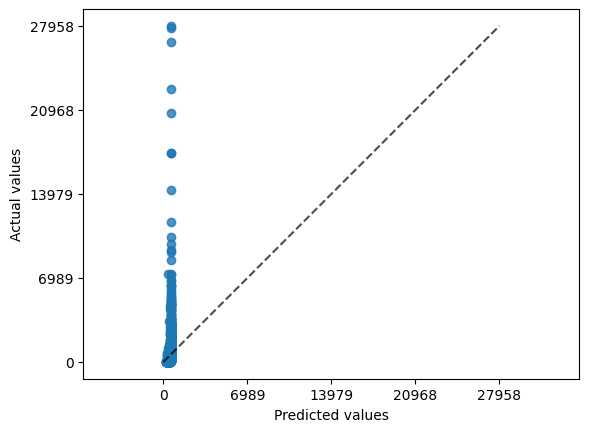

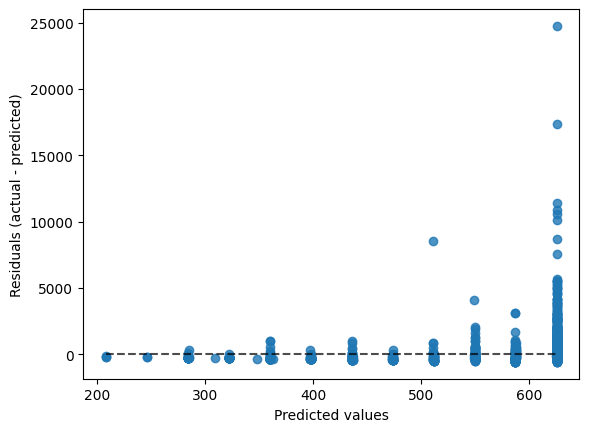

In [37]:
import sklearn.metrics as metrics
metrics.PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, kind="actual_vs_predicted")
metrics.PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred, kind="residual_vs_predicted")


2. Segun la grafica 1, el modelo ann2 está subestimando el valor de las compras, es decir, que por cada persona en promedio el modelo está prediciendo que compra menos de lo que realmente es.

In [38]:
credit_2 = pd.read_csv("/content/drive/MyDrive/COLAB/credit_card_clients2 (1).csv")
credit_2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,530.293538,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [39]:
#Nulos
credit_2.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [40]:
credit_2["MINIMUM_PAYMENTS"]=credit_df["MINIMUM_PAYMENTS"].fillna(credit_df["MINIMUM_PAYMENTS"].mean())
credit_2["CREDIT_LIMIT"]=credit_df["CREDIT_LIMIT"].fillna(credit_df["CREDIT_LIMIT"].mean())  # Se eliminan los registros nulos

In [44]:
### separar respuesta y explicativas
X_2 = credit_2.drop(['CUST_ID'], axis = 1) ##Eliminamos la variable respuesta y la variable ID para quedar solo con nuestras variables explicativas

In [46]:
predichos_2 = ann2.predict(X_2)
predichos_2

280/280 [==============================] - 0s 2ms/step


array([[625.59064],
       [359.90433],
       [587.3907 ],
       ...,
       [625.59064],
       [549.62054],
       [625.59064]], dtype=float32)

In [47]:
y_pred_2 = np.array(predichos_2)[:,0]
y_pred_2

array([625.59064, 359.90433, 587.3907 , ..., 625.59064, 549.62054,
       625.59064], dtype=float32)

In [48]:
np.sum(y_pred_2)

4797421.5

In [49]:
np.sum(y_actual)

8978683.26

3. La suma de todas las compras que realizaron los clientes según la predicción fue de 5.105.094, por lo tanto se espera que ese grupo de clientes realice menos compras de las que se tuvo en el periodo de julio a diciembre de 2022. Nota: Es preciso decir que ya evidenciamos que nuestro modelo está subestimando las compras y esta puede ser la razon por la cual el modelo está sesgando un poco la información

In [50]:
pred_ordenada = np.sort(y_pred_2)
pred_ordenada[-5:]

array([625.59064, 625.59064, 625.59064, 625.59064, 625.59064],
      dtype=float32)

In [51]:
res=y_actual-y_pred

np.std(res) ### 95% ()

2103.291390959795

In [52]:
np.mean(res)

467.1800812643211

(array([8.651e+03, 2.280e+02, 4.500e+01, 4.000e+00, 8.000e+00, 7.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([ -587.39068604,  4312.74631885,  9212.88332373, 14113.02032861,
        19013.1573335 , 23913.29433838, 28813.43134326, 33713.56834814,
        38613.70535303, 43513.84235791, 48413.97936279]),
 <BarContainer object of 10 artists>)

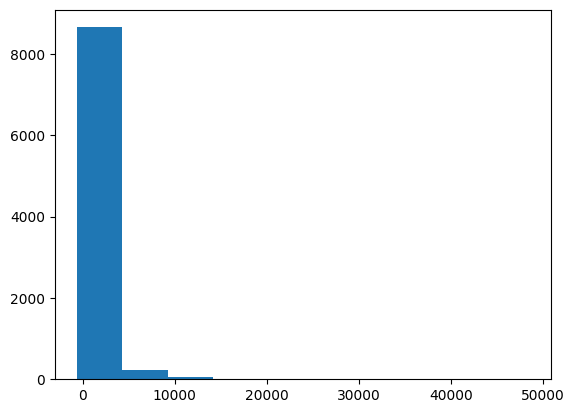

In [53]:
plt.hist(res, bins=10)

4. La predicción de compras de los 5 clientes que se espera que tengan mayor compras equivale a 623.63074 para cada cliente.

Y para el intervalo de confianza a cada una de las predicciones sumamos dos desviaciones estandar de los residuales y restamos dos desviaciones estandar de los residuales y de esta forma obtenemos un intervalo de confianza del 95%, suponiendo que los residuales se distribuyen normal.  (-2116.32 + PREDn, PREDn + 2116.32)

In [54]:
credit_df["PRED"] = y_pred
credit_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PRED
0,C10001,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,625.590637
1,C10002,3202.467416,0.909091,0.00,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,359.904327
2,C10003,2495.148862,1.000000,773.17,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,587.390686
3,C10004,1666.670542,0.636364,1499.00,530.293538,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,625.590637
4,C10005,817.714335,1.000000,16.00,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,397.977264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,625.590637
8946,C19187,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,625.590637
8947,C19188,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,625.590637
8948,C19189,13.457564,0.833333,0.00,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,549.620544


5.Una estrategia sería tratar de identificar patrones de comportamiento de la variable respuesta predicha respecto a valores de otras variables explicativas. Esto, con el fin de identificar como al cambiar algunos valores de algunas variables explicativas, podríamos aumentar el número de compras que realicen los clientes

Otra estrategia podría ser buscar los clientes que se predicen que no tienen compras (pred = 0), y de allí mirar qué afecta realmente este comportamiento, identificar variables explicativas que se repitan en los clientes con estas predicciones y buscar estrategias para modificar esos valores de dichas variables, buscando que el cliente comience a comprar.

Diseñar programas de fidelización basados en las preferencias y patrones de compra de los clientes. Ofrece descuentos, recompensas o promociones específicas para fomentar compras recurrentes o para incentivar la compra de productos relacionados con lo que suelen adquirir.